In [45]:
from caricatore_immagini import ImageLoader

In [46]:
# Indirizzi file e cartelle pulite 
train_dir = "images/FER2013Train"
val_dir = "images/FER2013Valid"
test_dir = "images/FER2013Test"

train_csv = "data/FER2013Train/label_train.csv"
val_csv = "data/FER2013Valid/label_valid.csv"
test_csv = "data/FER2013Test/label_test.csv"

In [47]:
train_set = ImageLoader(train_dir, train_csv)
X_train , y_train = train_set.load_data()

In [48]:
test_set = ImageLoader(test_dir , test_csv)
X_test , y_test = test_set.load_data()

In [49]:
val_set = ImageLoader(val_dir , val_csv)
X_val , y_val = val_set.load_data()

C:\Users\aless\AppData\Local\Temp\ipykernel_2388\2435505742.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(emotion_columns, rotation=45)
C:\Users\aless\AppData\Local\Temp\ipykernel_2388\2435505742.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(emotion_columns, rotation=45)
C:\Users\aless\AppData\Local\Temp\ipykernel_2388\2435505742.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(emotion_columns, rotation=45)


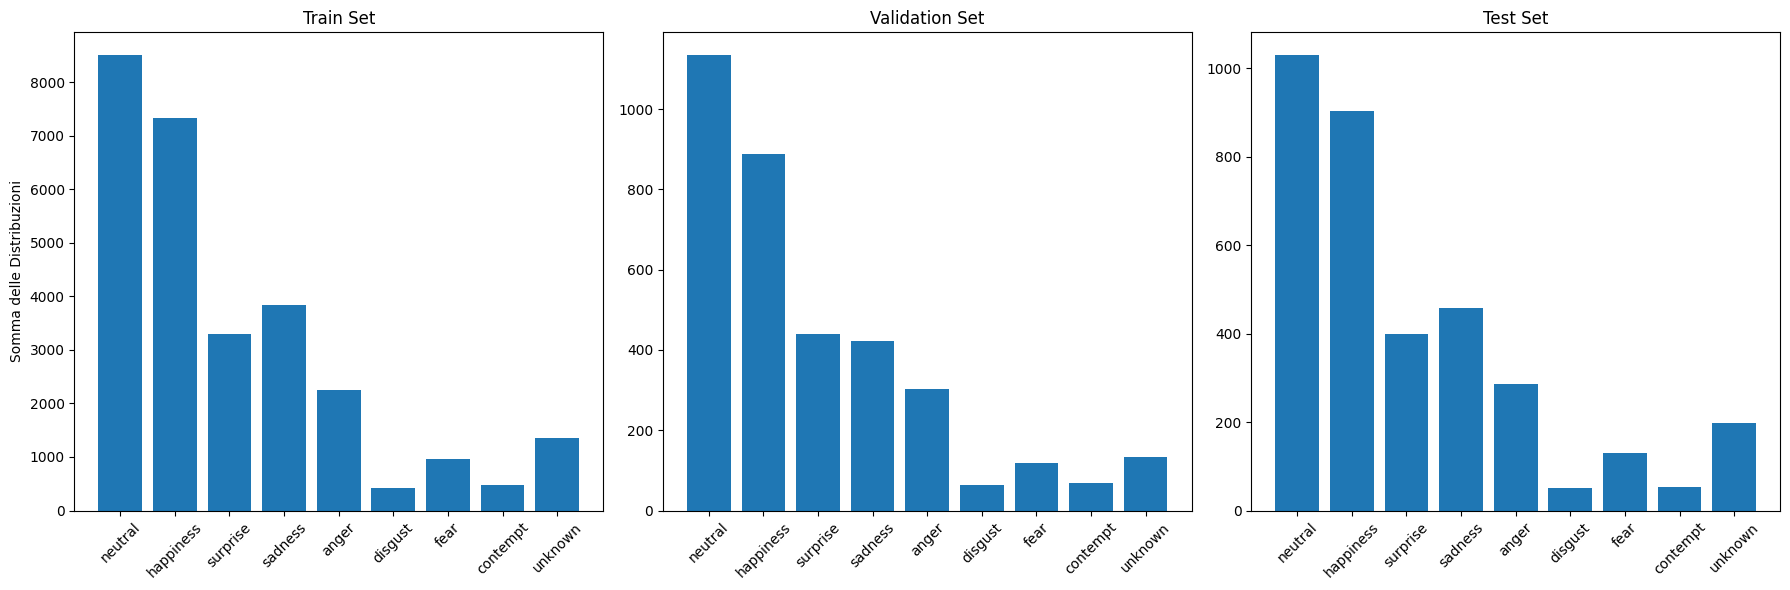

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Crezione df dei 3 csv
df_train = pd.read_csv(train_csv)
df_validation = pd.read_csv(val_csv)
df_test = pd.read_csv(test_csv)

# Elimina la colonna 'NF' se esiste in tutti i dataset
df_train = df_train.drop(columns=['NF'], errors='ignore')
df_validation = df_validation.drop(columns=['NF'], errors='ignore')
df_test = df_test.drop(columns=['NF'], errors='ignore')

# Colonne che rappresentano le emozioni
emotion_columns = ['neutral', 'happiness', 'surprise', 'sadness', 'anger', 'disgust', 'fear', 'contempt', 'unknown']

# Somma delle distribuzioni per ogni set
train_sum = df_train[emotion_columns].sum()/10
validation_sum = df_validation[emotion_columns].sum()/10
test_sum = df_test[emotion_columns].sum()/10

# Creazione della figura con tre subplots affiancati
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Grafico 1: Train
axes[0].bar(emotion_columns, train_sum)
axes[0].set_title('Train Set')
axes[0].set_xticklabels(emotion_columns, rotation=45)
axes[0].set_ylabel('Somma delle Distribuzioni')

# Grafico 2: Validation
axes[1].bar(emotion_columns, validation_sum)
axes[1].set_title('Validation Set')
axes[1].set_xticklabels(emotion_columns, rotation=45)

# Grafico 3: Test
axes[2].bar(emotion_columns, test_sum)
axes[2].set_title('Test Set')
axes[2].set_xticklabels(emotion_columns, rotation=45)

# Impostazione del layout per evitare sovrapposizioni
plt.tight_layout()

# Visualizzazione del grafico
plt.show()

In [51]:
emotion_columns = ['neutral', 'happiness', 'surprise', 'sadness', 'anger', 'disgust', 'fear', 'contempt', 'unknown']



In [54]:
# Cella per caricare il modello funzionale e quello sequenziale per dimotrare che funzionale è meglio
import tensorflow as tf

#model_path = 'modello75.keras'  
#model = tf.keras.models.load_model(model_path)
model_sequential = tf.keras.models.load_model('trained_bestmodel.keras')

In [55]:
#model.summary()
model_sequential.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 48, 48, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 48, 48, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 48, 48, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 24, 24, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 12, 12, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 12, 12, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,309,917 (5.00 MB)

 Trainable params: 436,489 (1.67 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 872,980 (3.33 MB)

In [56]:
test_loss, test_acc = model.evaluate(X_test, y_test)
test_loss_seq, test_acc_seq = model_sequential.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_acc_seq}")
print(f"Test loss: {test_loss_seq}")

110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7571 - loss: 1.0883
110/110 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.7841 - loss: 1.0337
Test accuracy: 0.7556947469711304
Test loss: 1.095776081085205
Test accuracy: 0.7907175421714783
Test loss: 1.038377285003662


   epoch      loss  accuracy  val_loss  val_accuracy
0      1  1.729323  0.450698  1.461837      0.606723
1      2  1.480321  0.600591  1.335717      0.646779
2      3  1.396871  0.636517  1.262308      0.668347
3      4  1.354124  0.648926  1.224928      0.685154
4      5  1.320641  0.662179  1.177352      0.708683

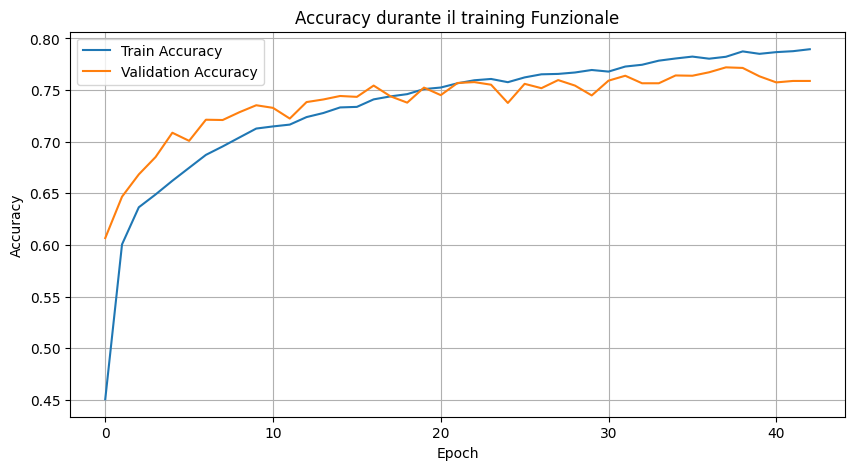

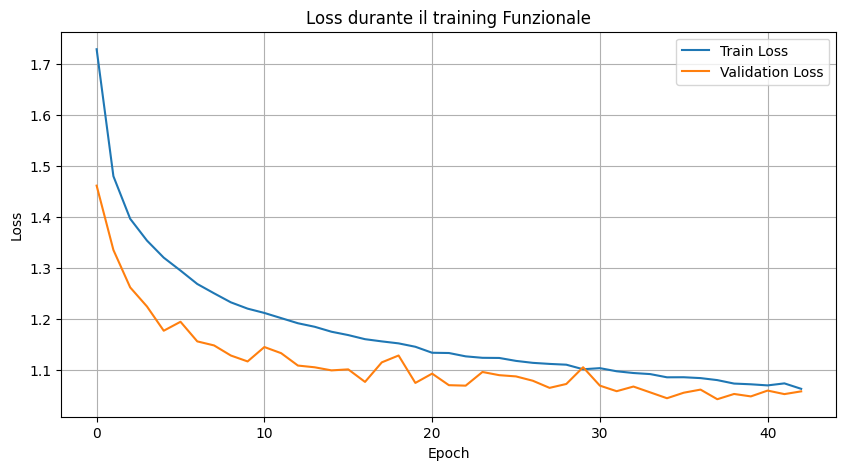

In [57]:
# Caricamento del file CSV
file_path = 'modello75plot.csv'  # Sostituisci con il percorso reale del file CSV
df = pd.read_csv(file_path)

# Stampa dei primi 5 record per verificare la struttura
print(df.head())

# Supponendo che il CSV contenga le colonne: 'epoch', 'accuracy', 'val_accuracy', 'loss', 'val_loss'

# Creazione del grafico dell'Accuracy
plt.figure(figsize=(10, 5))
plt.plot(df['accuracy'], label='Train Accuracy')
plt.plot(df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy durante il training Funzionale')
plt.legend()
plt.grid(True)
plt.show()

# Creazione del grafico del Loss
plt.figure(figsize=(10, 5))
plt.plot(df['loss'], label='Train Loss')
plt.plot(df['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss durante il training Funzionale')
plt.legend()
plt.grid(True)
plt.show()

Da queste perdite che convergono si può dedurre che modello sta generalizzando bene. mentre nel modello sequenziale la validation loss a un certo punto cresce segnalando l'arrivo di overfitting. Quindi scoperto che modello funzionale performa leggermente meglio.

Modello Funzionale:
   epoch      loss  accuracy  val_loss  val_accuracy
0      1  1.729323  0.450698  1.461837      0.606723
1      2  1.480321  0.600591  1.335717      0.646779
2      3  1.396871  0.636517  1.262308      0.668347
3      4  1.354124  0.648926  1.224928      0.685154
4      5  1.320641  0.662179  1.177352      0.708683

Modello Sequenziale:
   epoch      loss  accuracy  val_loss  val_accuracy
0      1  1.704448  0.469188  1.416556      0.617927
1      2  1.446229  0.615285  1.271397      0.668067
2      3  1.363804  0.647274  1.308119      0.676471
3      4  1.315369  0.662776  1.199316      0.701681
4      5  1.274761  0.683165  1.200535      0.709244


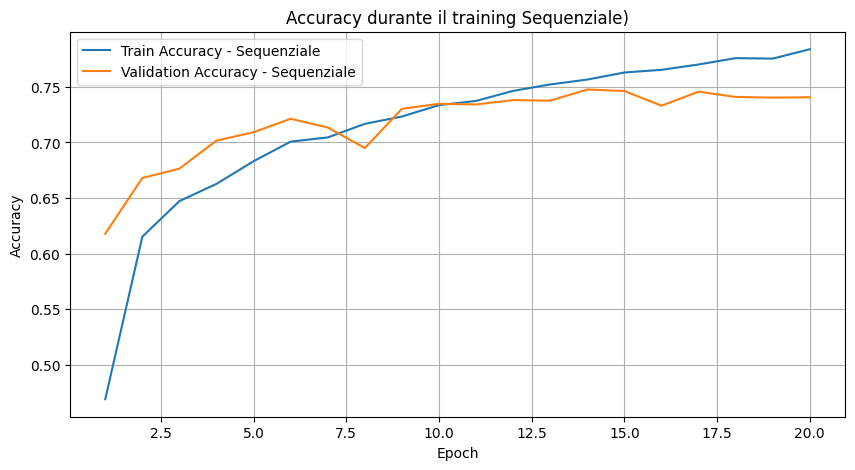

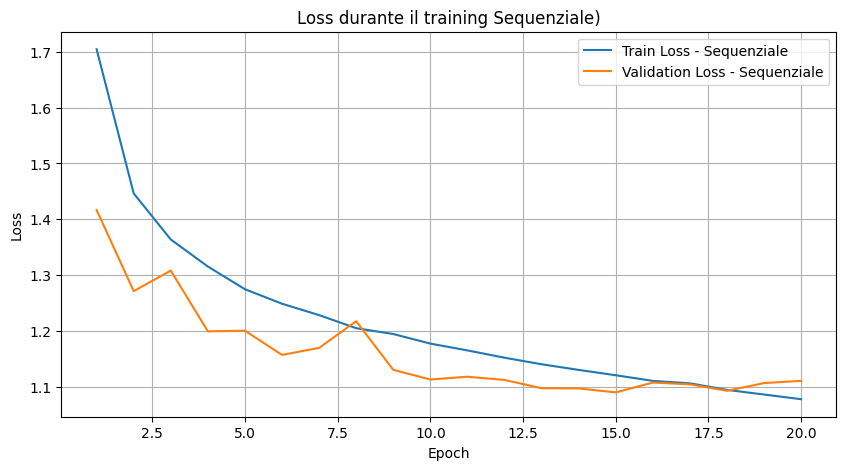

In [42]:
# Caricamento dei file CSV
file_path = 'modello75plot.csv'  # Percorso reale per il modello funzionale
df_func = pd.read_csv(file_path)  # Dati del modello funzionale
df_seq = pd.read_csv('sequential.csv')  # Dati del modello sequenziale

# Stampa dei primi 5 record per verificare la struttura di entrambi i file
print("Modello Funzionale:")
print(df_func.head())
print("\nModello Sequenziale:")
print(df_seq.head())

# Supponendo che i CSV contengano le colonne: 'epoch', 'accuracy', 'val_accuracy', 'loss', 'val_loss'

# Creazione del grafico dell'Accuracy
plt.figure(figsize=(10, 5))
#plt.plot(df_func['epoch'], df_func['accuracy'], label='Train Accuracy - Funzionale')
#plt.plot(df_func['epoch'], df_func['val_accuracy'], label='Validation Accuracy - Funzionale')
plt.plot(df_seq['epoch'], df_seq['accuracy'], label='Train Accuracy - Sequenziale')
plt.plot(df_seq['epoch'], df_seq['val_accuracy'], label='Validation Accuracy - Sequenziale')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy durante il training Sequenziale)')
plt.legend()
plt.grid(True)
plt.show()

# Creazione del grafico del Loss
plt.figure(figsize=(10, 5))
#plt.plot(df_func['epoch'], df_func['loss'], label='Train Loss - Funzionale')
#plt.plot(df_func['epoch'], df_func['val_loss'], label='Validation Loss - Funzionale')
plt.plot(df_seq['epoch'], df_seq['loss'], label='Train Loss - Sequenziale')
plt.plot(df_seq['epoch'], df_seq['val_loss'], label='Validation Loss - Sequenziale')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss durante il training Sequenziale)')
plt.legend()
plt.grid(True)
plt.show()

110/110 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step


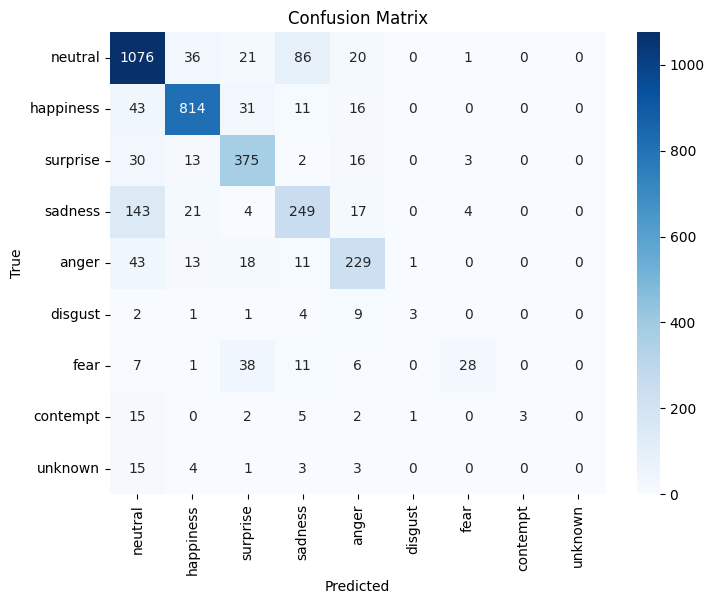

In [58]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np
# Supponiamo che tu abbia i dati di test (x_test) e le etichette vere (y_test)
# Esegui le predizioni sul set di test
y_pred = model_sequential.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Assicurati che y_test sia codificato correttamente se non lo è già (ad esempio se le etichette sono in forma categoriale)
if len(y_test.shape) > 1:  # Se y_test è in formato one-hot encoded
    y_test_classes = np.argmax(y_test, axis=1)
else:
    y_test_classes = y_test

# Creazione della matrice di confusione
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Visualizzazione della matrice di confusione usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_columns, yticklabels=emotion_columns)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [59]:
y_pred = model_sequential.predict(X_test)

110/110 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step


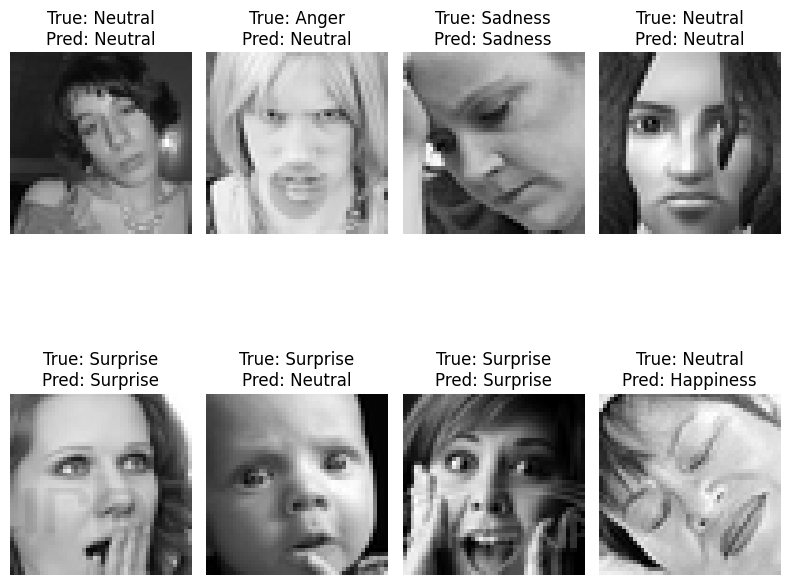

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Supponiamo che X_test sia il set di test delle immagini e y_test siano le etichette reali
# Le predizioni sono ottenute con il modello

y_pred_classes = np.argmax(y_pred, axis=1)  # Estrai la classe predetta
y_test_classes = np.argmax(y_test, axis=1)  # Se y_test è one-hot encoded

# Definizione delle etichette delle classi (ad esempio se hai 9 emozioni)
class_labels = ['Neutral', 'Happiness', 'Surprise', 'Sadness', 'Anger', 'Disgust', 'Fear', 'Contempt', 'Unknown']

# Seleziona casualmente 9 immagini dal set di test
random_indices = random.sample(range(len(X_test)), 9)
selected_images = X_test[random_indices]
selected_true_labels = y_test_classes[random_indices]
selected_pred_labels = y_pred_classes[random_indices]

# Creazione della figura per visualizzare le immagini
plt.figure(figsize=(8, 8))

for i in range(8):
    plt.subplot(2, 4, i + 1)
    # Se le immagini sono in grayscale con dimensione (48, 48, 1), usa cmap='gray'
    plt.imshow(selected_images[i].reshape(48, 48), cmap='gray')
    true_label = class_labels[selected_true_labels[i]]
    pred_label = class_labels[selected_pred_labels[i]]
    plt.title(f'True: {true_label}\nPred: {pred_label}')
    plt.axis('off')

# Mostra le immagini
plt.tight_layout()
plt.show()

110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


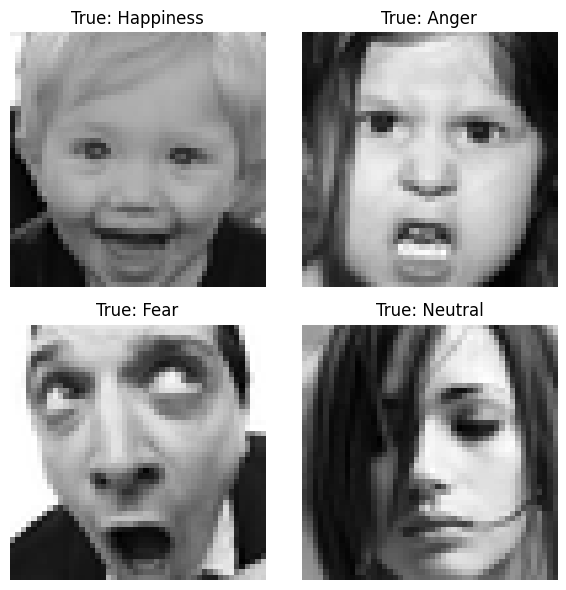

In [51]:
#Visualizzatore di immagini
import numpy as np
import matplotlib.pyplot as plt
import random

# Supponiamo che X_test sia il set di test delle immagini e y_test siano le etichette reali
# Le predizioni sono ottenute con il modello
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Estrai la classe predetta
y_test_classes = np.argmax(y_test, axis=1)  # Se y_test è one-hot encoded

# Definizione delle etichette delle classi (ad esempio se hai 9 emozioni)
class_labels = ['Neutral', 'Happiness', 'Surprise', 'Sadness', 'Anger', 'Disgust', 'Fear', 'Contempt', 'Unknown']

# Seleziona casualmente 4 immagini dal set di test
random_indices = random.sample(range(len(X_test)), 4)
selected_images = X_test[random_indices]
selected_true_labels = y_test_classes[random_indices]
selected_pred_labels = y_pred_classes[random_indices]

# Creazione della figura per visualizzare le immagini in una griglia 2x2
plt.figure(figsize=(6, 6))

for i in range(4):
    plt.subplot(2, 2, i + 1)
    # Se le immagini sono in grayscale con dimensione (48, 48, 1), usa cmap='gray'
    plt.imshow(selected_images[i].reshape(48, 48), cmap='gray')
    true_label = class_labels[selected_true_labels[i]]
    #pred_label = class_labels[selected_pred_labels[i]]
    plt.title(f'True: {true_label}')
    plt.axis('off')

# Mostra le immagini
plt.tight_layout()
plt.show()

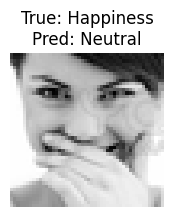

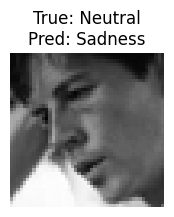

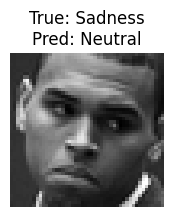

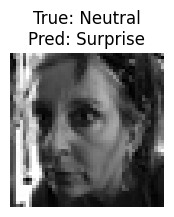

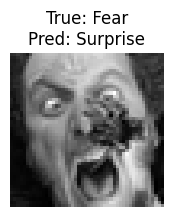

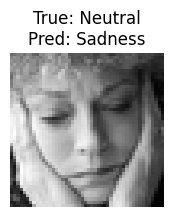

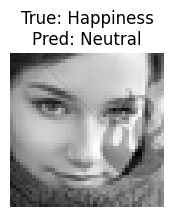

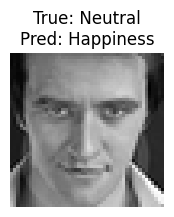

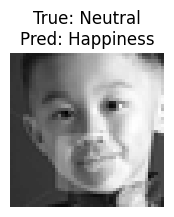

In [28]:
wrong_predictions_indices = np.where(y_pred_classes != y_test_classes)[0]

# Se ci sono più di 9 errori, seleziona casualmente 9 immagini sbagliate
selected_indices = random.sample(list(wrong_predictions_indices), 9)


selected_images = X_test[selected_indices]
selected_true_labels = y_test_classes[selected_indices]
selected_pred_labels = y_pred_classes[selected_indices]

# Visualizzazione delle immagini separatamente
for i in range(len(selected_images)):
    plt.figure(figsize=(4, 2))
    # Se le immagini sono in grayscale con dimensione (48, 48, 1), usa cmap='gray'
    plt.imshow(selected_images[i].reshape(48, 48), cmap='gray')
    true_label = class_labels[selected_true_labels[i]]
    pred_label = class_labels[selected_pred_labels[i]]
    plt.title(f'True: {true_label}\nPred: {pred_label}')
    plt.axis('off')
    plt.show()  # Mostra ogni immagine separatamente